<a href="https://colab.research.google.com/github/pratikiiitb2013/EVA/blob/master/Session3/EVA_Assignment3_1st_DNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries and modules**

In [1]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from keras.layers.normalization import BatchNormalization

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

(60000, 28, 28)


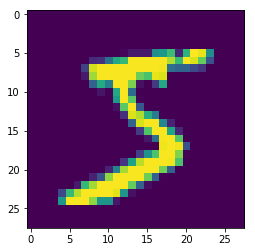

In [4]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [7]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [9]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [10]:
from keras.layers import Activation
model = Sequential()

 
model.add(Convolution2D(filters = 16, kernel_size = (3,3), 
                 activation ='relu', input_shape = (28,28,1)))
model.add(BatchNormalization())
model.add(Dropout(0.07))

model.add(Convolution2D(filters = 16, kernel_size = (3,3), 
                 activation ='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.07))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Convolution2D(10, 1, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.07))

model.add(Convolution2D(filters = 32, kernel_size = (3,3), 
                 activation ='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.07))

model.add(Convolution2D(filters = 32, kernel_size = (3,3), 
                 activation ='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Convolution2D(16, 1, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.07))

model.add(Convolution2D(10, 4))
model.add(Flatten())
model.add(Activation('softmax'))



Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [11]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
batch_normalization_1 (Batch (None, 26, 26, 16)        64        
_________________________________________________________________
dropout_1 (Dropout)          (None, 26, 26, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 16)        2320      
_________________________________________________________________
batch_normalization_2 (Batch (None, 24, 24, 16)        64        
_________________________________________________________________
dropout_2 (Dropout)          (None, 24, 24, 16)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 16)        0         
__________

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [13]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)

Instructions for updating:
Use tf.cast instead.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/10
60000/60000 [==============================] - 24s 405us/step - loss: 0.1696 - acc: 0.9491
Epoch 2/10
60000/60000 [==============================] - 22s 361us/step - loss: 0.0562 - acc: 0.9821
Epoch 3/10
60000/60000 [==============================] - 23s 378us/step - loss: 0.0438 - acc: 0.9860
Epoch 4/10
60000/60000 [==============================] - 22s 360us/step - loss: 0.0388 - acc: 0.9881
Epoch 5/10
60000/60000 [==============================] - 24s 394us/step - loss: 0.0326 - acc: 0.9897
Epoch 6/10
60000/60000 [==============================] - 22s 360us/step - loss: 0.0301 - acc: 0.9904
Epoch 7/10
60000/60000 [==============================] - 23s 379us/step - loss: 0.0266 - acc: 0.9914
Epoch 8/10
60000/60000 [==============================] - 22s 363us/step - loss: 0.0260 - acc: 0.9916
Epoch 9/10
60000/60000 [==============================] - 22s 364us/step - loss: 0.0234 - acc: 0.9923
Epoch 10/10
60000/60000 [==============================] - 23s 379us/step - loss: 

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [15]:
print(score)

[0.023674466580737498, 0.9931]


In [0]:
y_pred = model.predict(X_test)

In [17]:
print(y_pred[:9])
print(y_test[:9])

[[8.82200042e-12 1.95390637e-09 2.61295696e-08 2.66911115e-08
  1.41620084e-11 1.28953940e-11 8.10015913e-15 9.99999166e-01
  2.81707904e-12 8.79343077e-07]
 [6.62765569e-06 8.68733537e-07 9.99992132e-01 1.38511439e-07
  4.78449502e-10 2.82387525e-12 9.38589224e-08 1.88143314e-08
  8.34860643e-08 2.84206192e-09]
 [1.80705033e-08 9.99983191e-01 1.06256846e-06 6.90974922e-09
  6.71729538e-07 2.89601616e-07 3.94738834e-07 1.40968104e-05
  1.42925529e-07 1.51711959e-07]
 [9.99953151e-01 1.85226084e-10 1.02274939e-07 2.73224555e-06
  7.65278785e-10 4.62786467e-08 4.32542402e-05 1.45517742e-09
  5.82554208e-07 7.75453231e-08]
 [1.16516692e-11 1.63238969e-08 1.90627944e-10 2.41142644e-11
  9.99980688e-01 4.62289443e-11 6.47491882e-09 4.21109869e-10
  2.40556357e-08 1.92970620e-05]
 [3.37344801e-08 9.99949455e-01 3.78855162e-07 3.51356788e-09
  1.98131261e-06 3.54011886e-09 5.73704995e-08 4.75625639e-05
  4.11314964e-08 5.74350111e-07]
 [2.91207962e-14 2.94180637e-07 2.78216383e-09 5.79147516e

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

In [19]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_14'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()

KeyError: ignored